In [35]:
import pygimli as pg
from pygimli.physics.ert import ERTManager, createGeometricFactors
import matplotlib.pyplot as plt


In [36]:
file_path = '2019-11-30_1430.ohm'

data_mgr = ERTManager(file_path, sr=False, useBert=True, verbose=True, debug=False)
data_mgr.load(file_path)

In [37]:

#data_mgr.showData()

In [38]:
data_mgr.invert(lam=75, paraMaxCellSize=2, zWeight=0.6, # paraDepth=2 * max_depth,
                                        quality=34, zPower=0.4)

14/06/21 - 15:48:27 - pyGIMLi - INFO - Found 2 regions.
14/06/21 - 15:48:27 - pyGIMLi - INFO - Region with smallest marker set to background (marker=1)
14/06/21 - 15:48:27 - pyGIMLi - WARNING - Data file contains no geometric factors (token='k').
14/06/21 - 15:48:27 - pyGIMLi - INFO - Cache /home/felikskrno/anaconda3/envs/SlopeStability/lib/python3.7/site-packages/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 5): /home/felikskrno/.cache/pygimli/1054073465885184586
14/06/21 - 15:48:27 - pyGIMLi - INFO - Creating apparent resistivies from impedences rhoa = r * k
14/06/21 - 15:48:27 - pyGIMLi - INFO - Creating forward mesh from region infos.
14/06/21 - 15:48:27 - Core - WARNING - Region Nr: 1  is background and should not get a model transformation.
14/06/21 - 15:48:27 - Core - WARNING - Region Nr: 1  is background and should not get a model control.
14/06/21 - 15:48:27 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


<class 'pygimli.physics.ert.ert.ERTManager'>.applyMesh(methodManager.py:647) : Mesh: Nodes: 2389 Cells: 4501 Boundaries: 6889


14/06/21 - 15:48:27 - Core - WARNING - Region Nr: 1  is background and should not get a model transformation.
14/06/21 - 15:48:27 - Core - WARNING - Region Nr: 1  is background and should not get a model control.
14/06/21 - 15:48:27 - pyGIMLi - INFO - Starting inversion.
14/06/21 - 15:48:27 - pyGIMLi - INFO - Set default startmodel to median(data values)=9.311371958411126
14/06/21 - 15:48:27 - pyGIMLi - INFO - Created startmodel from forward operator: 3517 [9.311371958411126,...,9.311371958411126]


fop: <pygimli.physics.ert.ert.ERTModelling object at 0x7f5f94a9eaf0>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x7f5f94b0a0f0>
Model transformation (cumulative):
	 0 <pygimli.core._pygimli_.RTransLogLU object at 0x7f5f96cf2f80>
min/max (data): 0.82/8790
min/max (error): 0.008%/467%
min/max (start model): 9.31/9.31
--------------------------------------------------------------------------------


14/06/21 - 15:49:24 - Core - CRITICAL -  response for model with negative or zero resistivity is not defined.: 6.04255e-14 1.32809e+11


--------------------------------------------------------------------------------
inv.iter 2 ... 

14/06/21 - 15:51:00 - Core - CRITICAL -  response for model with negative or zero resistivity is not defined.: 1.05936e-15 1.06677e+18


chi² = 208531.06 (dPhi = 3.39%) lam: 75.0
--------------------------------------------------------------------------------
inv.iter 3 ... 

14/06/21 - 15:52:54 - Core - CRITICAL -  response for model with negative or zero resistivity is not defined.: 5.16718e-13 2.25444e+17


chi² = 200546.35 (dPhi = 3.83%) lam: 75.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 192206.05 (dPhi = 4.16%) lam: 75.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 169443.37 (dPhi = 11.83%) lam: 75.0
--------------------------------------------------------------------------------
inv.iter 6 ... chi² = 161064.98 (dPhi = 4.94%) lam: 75.0
--------------------------------------------------------------------------------
inv.iter 7 ... chi² = 153192.39 (dPhi = 4.88%) lam: 75.0
--------------------------------------------------------------------------------
inv.iter 8 ... chi² = 141199.94 (dPhi = 7.82%) lam: 75.0
--------------------------------------------------------------------------------
inv.iter 9 ... chi² = 124086.28 (dPhi = 12.1%) lam: 75.0
--------------------------------------------------------------------------------
inv.iter 10 ... chi² = 109313.92 (dPhi = 11.89%)

14/06/21 - 16:09:38 - Core - CRITICAL -  response for model with negative or zero resistivity is not defined.: 1.60782e-21 4.09347e+17


chi² = 105583.57 (dPhi = 3.41%) lam: 75.0
--------------------------------------------------------------------------------
inv.iter 12 ... 

14/06/21 - 16:11:22 - Core - CRITICAL -  response for model with negative or zero resistivity is not defined.: 1.30959e-27 8.11486e+12


chi² = 103580.29 (dPhi = 1.89%) lam: 75.0
################################################################################
#                 Abort criteria reached: dPhi = 1.89 (< 2.0%)                 #
################################################################################
Warning! unused keyword arguments {'paraMaxCellSize': 2, 'quality': 34, 'zPower': 0.4}


In [39]:
result_full = data_mgr.inv.model
result_array = result_full.array()

/home/felikskrno/anaconda3/envs/SlopeStability/lib/python3.7/site-packages/pygimli/viewer/mpl/colorbar.py:434: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mappable.get_cmap().set_bad([1.0, 1.0, 1.0, 0.0])


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x7f5f8f590a50>)

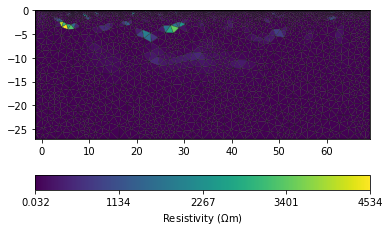

In [40]:
fig_result, ax_result = plt.subplots(1)
pg.show(data_mgr.paraDomain,
        result_full, label=pg.unit('res'), showMesh=True, ax=ax_result)

In [41]:
temp = pg.utils.interperc(result_full)